# Decision Boundary — Logistic Regression

This notebook explains the **decision boundary** used in logistic regression. It contains mathematical derivations, code that computes the sigmoid and decision boundary, visual examples with two classes, and an interactive widget to change parameters \(w_1, w_2, b\) and observe how the boundary moves.

**What you'll find:**

- Mathematical derivation of the sigmoid and decision boundary
- Implementation of `sigmoid(z)`
- Visualization of sample data points (two classes)
- Static and interactive decision boundary plots

Use this notebook in Jupyter or Google Colab. If `ipywidgets` is unavailable, the interactive cell will fall back to static parameter values.

## Math: Sigmoid and Decision Boundary

**Sigmoid (logistic) function:**


 $g(z) = \frac{1}{1 + e^{-z}}$


**Linear model for two features:**


$z = w_1 x_1 + w_2 x_2 + b$


The logistic prediction (probability) is:


 $p(y=1\mid x) = g(z) = \frac{1}{1+e^{-(w_1x_1 + w_2x_2 + b)}}$


The **decision boundary** is the set of points where the predicted probability equals 0.5:


 $g(z) = 0.5 \iff z = 0 \iff w_1 x_1 + w_2 x_2 + b = 0$


Solving for \(x_2\) gives the explicit line equation (if \(w_2 \neq 0\)):


 $x_2 = -\frac{w_1}{w_2} x_1 - \frac{b}{w_2}$


This line divides the plane into two half-spaces: one where the model predicts class 1 (\(g(z)>0.5\)) and the other where it predicts class 0 (\(g(z)<0.5\)).

In [6]:
# Imports and helper functions
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    """Compute sigmoid of z (works for scalars and numpy arrays)."""
    return 1.0 / (1.0 + np.exp(-z))

# Quick test
print('sigmoid(0)=', sigmoid(0))
print('sigmoid(4)=', sigmoid(4))
print('sigmoid(-4)=', sigmoid(-4))

sigmoid(0)= 0.5
sigmoid(4)= 0.9820137900379085
sigmoid(-4)= 0.01798620996209156


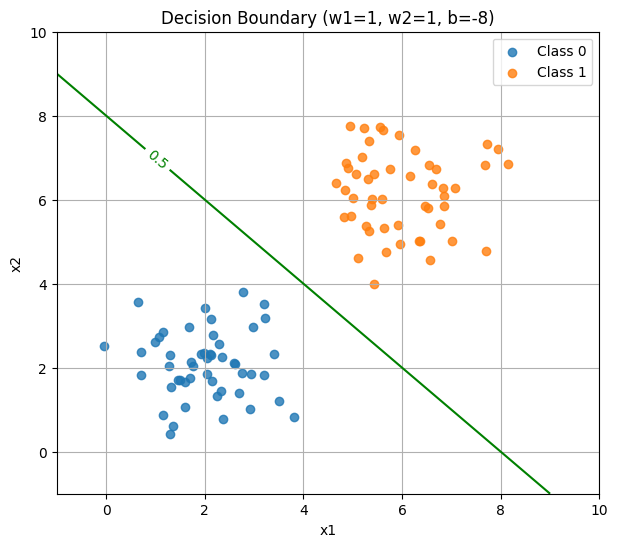

In [7]:
# Create sample data (two separable classes) and plot with a decision boundary example
np.random.seed(0)

# Class 0: centered near (2,2)
X0 = np.random.randn(50,2) * 0.8 + np.array([2,2])
# Class 1: centered near (6,6)
X1 = np.random.randn(50,2) * 0.9 + np.array([6,6])

X = np.vstack([X0, X1])
y = np.array([0]*len(X0) + [1]*len(X1))

# default parameters
w1, w2, b = 1.0, 1.0, -8.0

# grid for contour
xx1 = np.linspace(-1, 10, 200)
xx2 = np.linspace(-1, 10, 200)
XX1, XX2 = np.meshgrid(xx1, xx2)
Z = w1 * XX1 + w2 * XX2 + b
G = sigmoid(Z)

plt.figure(figsize=(7,6))
plt.scatter(X0[:,0], X0[:,1], label='Class 0', alpha=0.8)
plt.scatter(X1[:,0], X1[:,1], label='Class 1', alpha=0.8)
# plot decision boundary (contour at 0.5)
cs = plt.contour(XX1, XX2, G, levels=[0.5], colors='green')
plt.clabel(cs, inline=True, fontsize=10)
plt.title('Decision Boundary (w1=1, w2=1, b=-8)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.show()

### What the plot shows

- Blue points = **Class 0**, Orange points = **Class 1**.
- The green contour is the decision boundary where \(g(z)=0.5\) or \(z=0\).
- Points on one side of the line are predicted as class 1; points on the other side are class 0.

Try changing the parameters \(w_1, w_2, b\) to see how the boundary rotates and shifts.

In [8]:
# Interactive widget to change w1, w2, b (uses ipywidgets if available)
try:
    import ipywidgets as widgets
    from IPython.display import display

    def plot_boundary(w1=1.0, w2=1.0, b=-8.0):
        Z = w1 * XX1 + w2 * XX2 + b
        G = sigmoid(Z)
        plt.figure(figsize=(7,6))
        plt.scatter(X0[:,0], X0[:,1], label='Class 0', alpha=0.8)
        plt.scatter(X1[:,0], X1[:,1], label='Class 1', alpha=0.8)

        cs = plt.contour(XX1, XX2, G, levels=[0.5], colors='green')
        plt.clabel(cs, inline=True, fontsize=10)
        plt.title(f'Decision Boundary (w1={w1}, w2={w2}, b={b})')
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.legend()
        plt.grid(True)
        plt.show()

    w1_slider = widgets.FloatSlider(value=1.0, min=-5.0, max=5.0, step=0.1, description='w1')
    w2_slider = widgets.FloatSlider(value=1.0, min=-5.0, max=5.0, step=0.1, description='w2')
    b_slider = widgets.FloatSlider(value=-8.0, min=-20.0, max=20.0, step=0.5, description='b')

    ui = widgets.VBox([w1_slider, w2_slider, b_slider])
    out = widgets.interactive_output(plot_boundary, {'w1': w1_slider, 'w2': w2_slider, 'b': b_slider})

    display(ui, out)
except Exception as e:
    print('Interactive widgets are not available in this environment.')
    print('You can still run the static plotting cell and change parameters manually.')


Output()

## Deriving the explicit line equation

As discussed, the decision boundary satisfies:

$
 w_1 x_1 + w_2 x_2 + b = 0
$

If $(w_2 \neq 0), solve for (x_2):$


$ x_2 = -\frac{w_1}{w_2} x_1 - \frac{b}{w_2}$


This shows the boundary is a straight line with slope \(-w_1/w_2\) and intercept \(-b/w_2\).

## Practical notes

- The orientation of the decision boundary depends on the ratio \(w_1/w_2\).
- The bias \(b\) shifts the line without rotating it.
- In higher dimensions the decision boundary becomes a hyperplane.
- When training logistic regression, the algorithm learns \(w\) and \(b\) to separate classes.

Try experimenting with different data distributions and see whether the learned linear boundary can separate the classes.